# TIA Portal Openness Demo
In this notebook a short demo is given of how to work with openness.

Software used:
 - Windows 10
 - Visual Studio Code
 - Python 3.11.4 - 3.11.9
 - TIA Portal 15.1:
    -  SIMATIC STEP 7 Professional - WinCC Professional v15.1 Upd5
    -  SIMATIC Step 7 Safety v15.1
    -  SIMATIC Visualization Architect v15.1
    -  SINAMICS Startdrive V15.1

Versions of the Python-packages can be found in the requirements.txt file --> cmd --> pip install -r C:\Users\QBAUWEN1\Downloads\requirements.txt


### 1. importing Openness library to python 

1. Connecting Openness library to python application. The dll - files are installed togheter with tia portal. The main installation path is: <br>
&emsp;&emsp; __'C:\Program Files\Siemens\Automation\Portal V15_1\PublicAPI\V15.1\Siemens.Engineering.dll'__ <br>
_Note: The version changes depending on version of TIA Portal_

2. For running in Notebook.ipynb file a second dll-file is required (not for reuglar python.py file ) 


In [2]:
# from the pythonnet package, integration with .NET Common Language Runtime (CLR) 
import clr # pip install pythonnet 

# Refference to the Openness library
clr.AddReference('C:\\Program Files\\Siemens\\Automation\\Portal V15_1\\PublicAPI\\V15.1\\Siemens.Engineering.dll')
# Refference to run Openness in Notebook (not necessary when running application in terminal)
clr.AddReference('C:\\Program Files\\Siemens\\Automation\\Portal V15_1\\Bin\\PublicAPI\\Siemens.Engineering.Contract.dll')

# importing the library
import Siemens.Engineering as tia
#path tho project file
#project_path = 'C:\\Users\\QBAUWEN1\\Documents\\P301110A01\\P301110A01.ap15_1'
project_path = 'C:\\Temp\\P712713A01\\P712713A01.ap15_1'

### 2. Starting TiA Portal instance and opening TIA project


In [3]:
from System.IO import FileInfo

if False:
    # Starting tia with User Interface (handy for development)
    mytia = tia.TiaPortal(tia.TiaPortalMode.WithUserInterface)
else:
    # Starting tia without User Interface
    mytia = tia.TiaPortal(tia.TiaPortalMode.WithoutUserInterface)

# Opening a TIA Project
fileInfo = FileInfo(project_path) # path to project
myproject = mytia.Projects.Open(fileInfo)

__myproject__ corresponds to _P209000A01_ in the figure below. <br>
Navigating through a project happens in the same way as in TIA Portal. First Folders are the HW-objects.

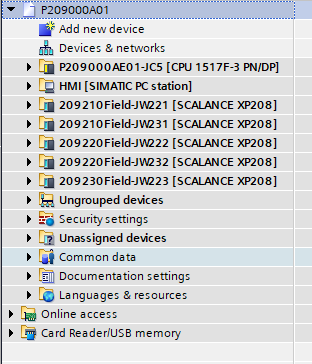

Folders like _Program Blocks_ and _PLC Tags_ are an element of the PLC as can be seen in the figure below.

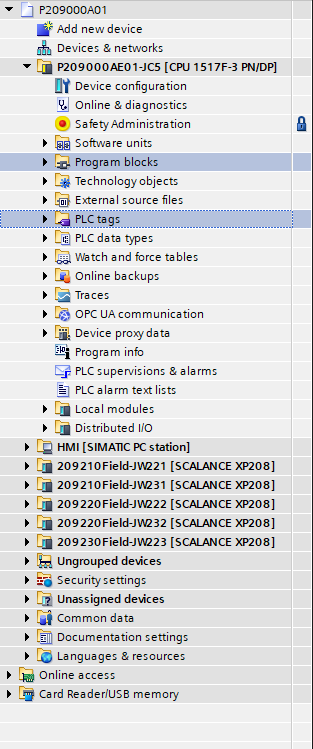

### 3. Project information

Some information of the project can be found directly as attribute of the _myproject_ object:

In [4]:
print('Project Information')
print('Name: \t\t\t', myproject.Name)
print('Creation time:\t\t', myproject.CreationTime)
print('Last Change:\t\t', myproject.LastModified)
print('Author:\t\t\t', myproject.Author)			
print('Last modified by:\t', myproject.LastModifiedBy)


Project Information
Name: 			 P712713A01
Creation time:		 19/02/2018 12:30:58
Last Change:		 19/01/2024 12:52:37
Author:			 Imtech
Last modified by:	 QBAUWEN1


In [5]:
print('Project History')
print('DateTime\t\t', 'Event\t\t')
for event in myproject.HistoryEntries:
    print(event.DateTime, '\t',event.Text)

Project History
DateTime		 Event		
19/02/2018 12:40:55 	 Migration from STEP 7 K5.5.4.0, WinCC V7.4 to V14 SP1
19/02/2018 15:00:47 	 Created by user in version CPU 319F-3 PN/DP PLC migration
23/02/2018 14:29:31 	 Mass data import
23/02/2018 14:30:25 	 Mass data import
23/02/2018 14:31:41 	 Mass data import
23/02/2018 14:33:44 	 Mass data import
23/02/2018 15:34:40 	 Mass data import
1/03/2018 13:12:21 	 Mass data import
2/03/2018 12:11:27 	 The project was updated from project library.
2/03/2018 12:17:01 	 The project was updated from project library.
2/03/2018 12:36:59 	 Mass data import
2/03/2018 13:04:02 	 Mass data import
2/03/2018 13:25:29 	 Mass data import
2/03/2018 13:26:20 	 Mass data import
14/03/2018 13:55:30 	 Mass data import
14/03/2018 13:57:29 	 Mass data import
14/03/2018 13:57:57 	 Mass data import
20/03/2018 13:18:22 	 The project was updated from project library.
29/03/2018 14:57:49 	 Mass data import
29/03/2018 14:58:16 	 Mass data import
26/04/2018 8:13:14 	 Mass d

### 4. HW

First step will be to acces the hardware of _myproject_.

1. Devices Directly under the _myproject_-folder can be found with the __.Devices__ attribute.
    - __myproject.Devices__ Generates a list of the devices directly under the main project folder.
<br><br>

2. for devices in the _Ungrouped devices_-folder:
    - __myproject.UngroupedDevicesGroup__ navigates to the _Ungrouped devices_-folder.
    - __.Devices__ will generate a list of devices in this folder.
<br><br>

3. For custom folders:
    - __myproject.DeviceGroups__ Generates a list of custom folders.
    - for each custom folder as CustomFolder:
        - __CustomFolder.Devices__ will generate a list of devices in this folder.
        - __CustomFolder.Groups__ Will generate a list of the subfolders in this folder




In [6]:
# Devices Directly under the myproject-folder
for device in myproject.Devices:
    print(device.Name) # Printing the name of the device

P209000AE01-JC5
209210Field-JW221
209220Field-JW222
209230Field-JW223
HMI
209210Field-JW231
209220Field-JW232


In [7]:
# Devices under the Ungrouped devices Folder
for device in myproject.UngroupedDevicesGroup.Devices:
    print(device.Name) # Printing the name of the device

209000AK01-JW35
209000AK03-JW36
209000AK04-JW37
209000AS01-JW38
209000AS02-JW39
209210AS10-JW40
209210AX01-JW41
209210CWP10-JX44
209230AX01-JW61
209230AS10-JW60
209000AK03M1-UE130
209000AK03M4-UE131
209000AK03M1-UE133
209000AK03M4-UE132
209210CHB21M14-UE134
209220CHB21M14-UE144
209230CA21M4-UE150
209230CHB21M14-UE151
209230CR22M1-UE153
209000AE02-JW208
209000AK01E1-BE30
209000AK02-JC32
209000AE01-JC31
209210AS11-JW42
209210AX02-JW43
209210CWP20-JX46
209210AS20-JW48
209230CHB22M14-UE152
211212AE1-JW200
209000AE02-JW210
209220AX02-JW53
209220CWP10-JX54
209220AX01-JW51
209220AS10-JW50
209220AS11-JW52
209220CWP20-JX56
209220AS20-JW58
209000AK04M1-UE140
209000AK04M4-UE141
209000AK04M4-UE142
209000AK04M1-UE143
209000AE02-JW70
209210CWP10-JX45
209210CWP20-JX47
209220CWP10-JX55
209220CWP10-JX57
209230ASD01-JW190
209000AE02-JW71
209000AE02-JW211


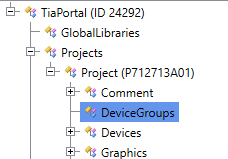

In [8]:
# Creating own groups will be located in the attribute .DeviceGroups of the myprojcet item. 
for group in myproject.DeviceGroups:
    print(group.Devices)
    print(group.Groups)

All of the Devices will have Device Items. This will follow the same topologie as in TIA Portal (Figure below).

__.DeviceItems__ will acces the different items in a device. This Item will have on its turn new DeviceItems.

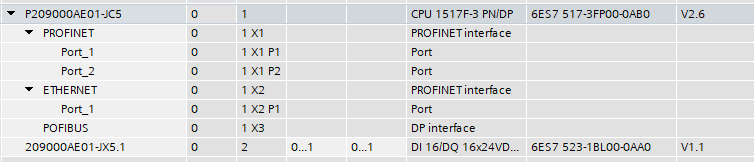

In [9]:
device = myproject.Devices[0] # PLC, always first device
print(device.Name, '\n')

for item in device.DeviceItems:
    print(item.Name)
    for i in item.DeviceItems:
        print('\t', i.Name)
        for e in i.DeviceItems:
            print('\t\t', e.Name)
    

P209000AE01-JC5 

Rail_0
P209000AE01-JC5
	 Card reader/writer_1
	 P209000AE01-JC5
	 CPU display_1
	 CPU exec unit_1
	  P209000AE01-JC5
	 OPC UA_1
	 CpuFExecUnit_1
	 POFIBUS
	 PROFINET
		 Port_1
		 Port_2
	 ETHERNET
		 Port_1
209000AE01-JX5.1
	 209000AE01-JX5.1


An itterative function can be written to acces all the devices and deviceItems.

Second, only the plc's can be taken from the items. This is based on the classification poperty. 

Possible DeviceItemClassification: 
   - None
   - CPU (Central Processing Unit)
   - HM (Head Module) 

In [10]:
# Get all the hardware 
def give_items(device, Items=[]) -> list:
    
    for item in device.DeviceItems:
        Items.append(item)
        Items = give_items(item, Items)
    return Items

def get_devices(group, Items=[]):
    '''
    Returns all the devices of a group.
    '''
    for device in group.Devices:
        Items = give_items(device, Items)
    return Items
    
def get_groups(group_composition, Items=[]):
    '''
    Returns alle the groups and devices of a group-composition. 
    '''
    for group in group_composition:
        Items = get_devices(group, Items)
        Items = get_groups(group.Groups, Items)
    return Items

def GetAllItems(myproject):
    '''
    Returns a list of all the DeviceItems such as plc's, interfaces, ports, ...
    Does not include the stations. 
    '''

    Items = []
    Items.extend(get_devices(myproject))
    Items.extend(get_devices(myproject.UngroupedDevicesGroup))
    Items.extend(get_groups(myproject.DeviceGroups))
    Items = list(set(Items)) # removes all the duplicates
    return Items


Items = GetAllItems(myproject) # a list of all the devices and deviceItems


In [11]:
for item in Items:
    print(item.Name, item.Classification)

4 DO None
209220AX01-JW51 None
209000AS02-JX39.1 None
F-Module I/O (2 Byte) None
209210CWP10-JC45 None
DFS22B (8 Byte) None
209000AS02-JX39.11 None
209220AS20-JX58.6 None
209220AS10-JX50.6 None
Rack None
Enabling switch module standard None
P209000AE01-JC5 CPU
DFS22B (8 Byte) None
209230CA21M4-UE150 None
209000AE02-JW208.X1 None
209000AS02-JW39 HM
Port_2 None
209000AK03M1-UE130 HM
209230AS10-JX60.4 None
CPC20-Dev None
 Slot 4 not used None
209220AX02-JW53 None
3 Process Data words None
209210AS10-JX40.5 None
209210CHB21M14-UE134 None
Port 2 - RJ45 (X31) None
Port 1 - RJ45 (X30) None
8 DI DC24V 8xM12 None
Measurement U/I None
209000AK03-JX36.1 None
MOVIFIT Status None
DFS21B (2 Byte) None
BA 2xRJ45 None
209220AS20-JW58 None
209210AX02-JX43.2 None
209220AS10-JX50.2 None
209230AS10-JX60.3 None
Measurement U/I None
Current L3 None
209220AS11-JX52.3 None
209210AS11-JX42.2 None
209210AX02-JX43.12 None
209230AX01-JX61.11 None
Rack None
MOVIFIT Classic V1.7 None
DFS22B (8 Byte) None
MOVIFIT St

In [12]:
PLC = [] # create an empyt list to store all the PLC's
for item in Items:
    if str(item.Classification) == 'CPU':
        PLC.append(item)

In [13]:
# print the name of the plc's found in the project
for plc in PLC:
    print(plc.Name)

P209000AE01-JC5


### 5. HW - Features

Some of the hardware can access more features: such as Software, HW interfaces, HMI's, Drives, ...

To enable these features, We make use of the service_provider of the dll. 

&emsp; &emsp; --> serviceProvider( Hardware Object ).GetService\[ Hardware Feature \]()

#### 5.1 HW - Features: Network Interface

Feature to get the interface of the harware to the network. This can give all the connected devices. This can be used to make a graph of the whole network.

In [14]:
# Import the HW Features
import Siemens.Engineering.HW.Features as hwf 

for deviceitem in Items: # for all the devices and deviceItems in the project
    try: # QB - added try except to catch errors of profinet interface
        network_service = tia.IEngineeringServiceProvider(deviceitem).GetService[hwf.NetworkInterface]() # get the interface service
        if type(network_service) == hwf.NetworkInterface: # check wether the service do excist (== type Siemens.Engineering.HW.Features.NetworkInterface)
            print(network_service.GetAttribute('Name'), "\t\t" ,network_service) # print the name of all the items with an interface-service
    except:
        print("\nERROR WITH DEVICE: \t\t", deviceitem.Name, "\n")
        continue

209220AX01-JW51 		 Siemens.Engineering.HW.Features.NetworkInterface
209230CA21M4-UE150 		 Siemens.Engineering.HW.Features.NetworkInterface
209000AE02-JW208.X1 		 Siemens.Engineering.HW.Features.NetworkInterface
209210CHB21M14-UE134 		 Siemens.Engineering.HW.Features.NetworkInterface
209210Field-JW221 		 Siemens.Engineering.HW.Features.NetworkInterface
209000AS02-JW39 		 Siemens.Engineering.HW.Features.NetworkInterface
209230Field-JW223 		 Siemens.Engineering.HW.Features.NetworkInterface
209000AK02-JC32 		 Siemens.Engineering.HW.Features.NetworkInterface
209000AS01-JW38 		 Siemens.Engineering.HW.Features.NetworkInterface
209000AK04M4-UE142 		 Siemens.Engineering.HW.Features.NetworkInterface
209230CHB21M14-UE151 		 Siemens.Engineering.HW.Features.NetworkInterface
209230CHB22M14-UE152 		 Siemens.Engineering.HW.Features.NetworkInterface
209210AS10-JW40 		 Siemens.Engineering.HW.Features.NetworkInterface
ETHERNET 		 Siemens.Engineering.HW.Features.NetworkInterface
209230AX01-JW61 		 Siemens


Display Connections...


End of display



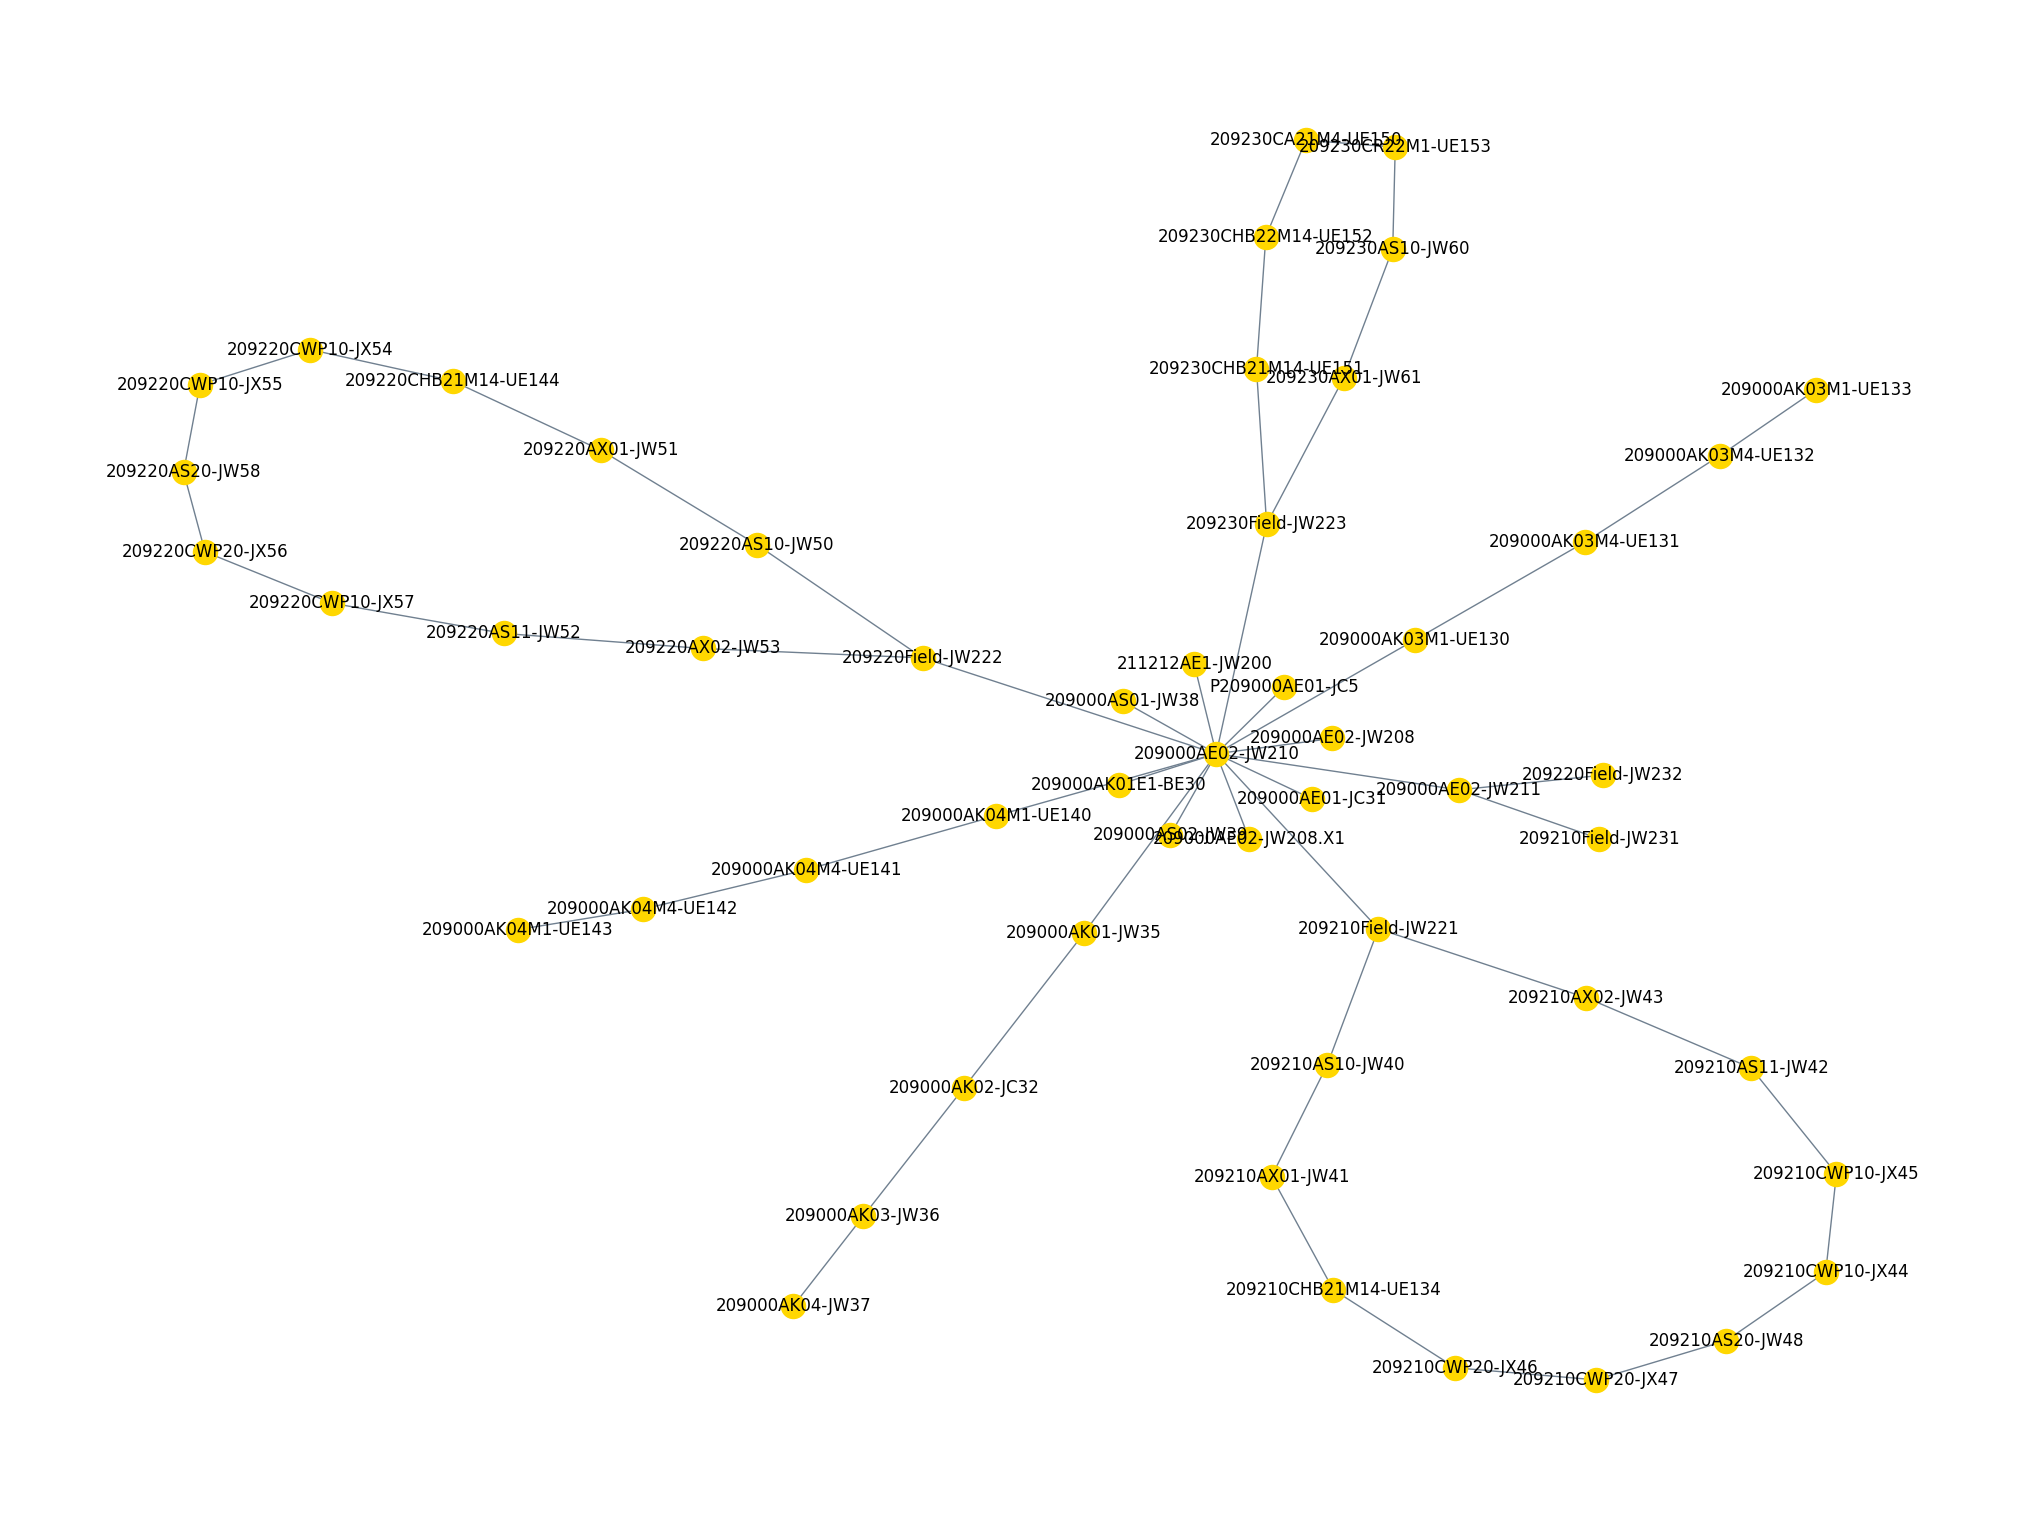

In [15]:
# The interface service can help us to show whitch device is connected to whitch device. 
# The following code will make a graph of all the interfaces connected to each other
import matplotlib.pyplot as plt
import networkx as nx

def DisplayConnections(Items, save=False):
    '''
    Find all the connections between the devices. 
    Display all the connections in a graph. 
    The distinction is made based on the Name of the device.
    '''
    print('\nDisplay Connections...\n')

    G = nx.Graph() # initialize the graph

    for deviceitem in Items: # for all items and device items in project
        network_service = tia.IEngineeringServiceProvider(deviceitem).GetService[hwf.NetworkInterface]() # get the interface service
        if type(network_service) == hwf.NetworkInterface: # check wether the service do excist

            for port in network_service.Ports: # get the ports from the interface 

                if port.ConnectedPorts.Count != 0: # check whether the port is connected 
                    node1_name = str(deviceitem.Parent.GetAttribute('Name')) # Name of the station of the interface to use as node in the graph 

                    connected_port = port.ConnectedPorts[0].OwnedBy  # Find the port to who the interface is connected and its controller
                    connected_interface = connected_port.Parent 
                    connected_item = connected_interface.Parent

                    node2_name = str(connected_item.GetAttribute('Name')) # Get the name of the station of the connected interface 

                    G.add_edge(node1_name, node2_name) # add the connection to the graph
    
    fig = plt.figure('DisplayConnections') # create a figure
    fig.set_figheight(15)
    fig.set_figwidth(20)

    pos = nx.spring_layout(G, seed=42)  # positions for all nodes, gives everytime the same layout
    nx.draw(G, pos, with_labels=True, node_color='gold', edge_color='slategray') # draw the graph in the figure

    print('\nEnd of display\n')

    pass

DisplayConnections(Items)


#### 5.2 HW -Features: PLC-Software


The Software will always be an element of the plc. This software contains the Tagtables, Watch and Force Tables, Blocks, Types,... The figure below gives the PLC in TIA Portal.

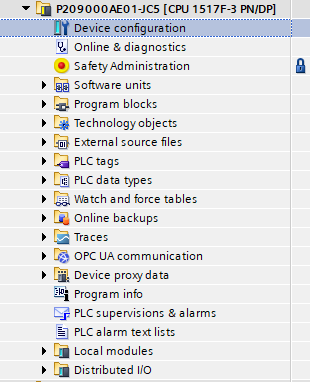

##### 5.2.1 HW-Features: PLC-Software: PLC-Blocks 

To Get acces to the software blocks of the plc:
1. navigate to the software feature of the plc
2. Go to the blockgroup 
3. in the Blockgroup, navigate through the blocks and groups in a simular way as in HW Devices


All the blocks can be exported to an .xml file and reprocessed in other application.

In [16]:
plc = PLC[0] # get the plc 
software_container = tia.IEngineeringServiceProvider(plc).GetService[hwf.SoftwareContainer]() # Getting the software container
plc_software = software_container.Software # getting the plc software

print(plc_software.Name) # The PLC-Software has the same name as the plc itself.
print(plc_software.BlockGroup.Name) # The main folder of the PLC Blocks.

P209000AE01-JC5
Program blocks


In [17]:
Program_blocks = plc_software.BlockGroup # main folder of the plc blocks
print('Blocks:')
for block in Program_blocks.Blocks: # all plc-blocks directly under the main folder
    print('\t',block.Name)

print('\n')
print('Folders: ')
for group in Program_blocks.Groups: # all plc-groups directly under the main folder
    print('\t',group.Name)
    for block in group.Blocks:
        print('\t\t',block.Name)

Blocks:
	 Changes


Folders: 
	 PLC OB:s
		 CYC_Proc
		 COMPLETE RESTART
		 CYCL_FLT
		 HW_INT0
		 I/O_FLT1
		 I/O_FLT2
		 MOD_ERR
		 PROG_ERR
		 RACK_FLT
		 CYC_INT2
		 FOB_RTG
		 CYC_INT5
		 209000NCP01
		 Cyclic interrupt
	 _PLC209 DB:s
	 PLC Safety
		 FSafety
		 F209000NCP01EstpInput
		 F209220ZS01Input
		 F209220ZS01Logic
		 F209220ZS01Output
		 F209210ZS01Input
		 F209210ZS01Logic
		 F209210ZS01Output
		 F209230ZS01Output
		 F209230ZS01Input
		 F209230ZS01Logic
	 _GlobalLib
	 _LocalLibGB
	 _LocalLibVCG
	 209220ZS01
		 209220ZS01
		 209220ZS01AEAK
		 209220ZS01Passiv
		 209220ZS01PNIODiag
		 209220ZS01AS
		 209220ZS01Safety
	 209210ZS01
		 209210ZS01
		 209210ZS01AEAK
		 209210ZS01Passiv
		 209210ZS01PNIODiag
		 209210ZS01Safety
		 209210ZS01AS
	 209230ZS01
		 209230ZS01
		 209230ZS01AEAK
		 209230ZS01Passiv
		 209230ZS01PNIODiag
		 209230ZS01Safety
		 209230ZS01AS
	 PLC General
		 209000NCP01PNIODiagList
		 DiagPLCOverview
		 209000NCP01Passiv
		 209000NCP01PNIODiag
		 209000NCP0

In [18]:
# Get all the blocks within a group
def get_blocks(group):
    Blocks = [] # list to store all the blocks
    for block in group.Blocks: # all the blocks directly in the folder
        Blocks.append(block) # add them to the list
    for sub_group in group.Groups: # for all the subgroups in the folder
        Blocks.extend(get_blocks(sub_group)) # get all the blocks of the subgroup
    return Blocks # returns the list of all the blocks

Blocks = get_blocks(plc_software.BlockGroup) # all the blocks of the main Block-folder in the plc

for block in Blocks:
    print(block, block.Name, block.Number) # print the name of all the blocks

Siemens.Engineering.SW.Blocks.FC Changes 1
Siemens.Engineering.SW.Blocks.OB CYC_Proc 34
Siemens.Engineering.SW.Blocks.OB COMPLETE RESTART 100
Siemens.Engineering.SW.Blocks.OB CYCL_FLT 80
Siemens.Engineering.SW.Blocks.OB HW_INT0 40
Siemens.Engineering.SW.Blocks.OB I/O_FLT1 82
Siemens.Engineering.SW.Blocks.OB I/O_FLT2 83
Siemens.Engineering.SW.Blocks.OB MOD_ERR 122
Siemens.Engineering.SW.Blocks.OB PROG_ERR 121
Siemens.Engineering.SW.Blocks.OB RACK_FLT 86
Siemens.Engineering.SW.Blocks.OB CYC_INT2 32
Siemens.Engineering.SW.Blocks.OB FOB_RTG 123
Siemens.Engineering.SW.Blocks.OB CYC_INT5 35
Siemens.Engineering.SW.Blocks.OB 209000NCP01 1
Siemens.Engineering.SW.Blocks.OB Cyclic interrupt 30
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01ComVD 256
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01VDComMasterAlarmReportSnd 201
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01VDComMasterAlarmReportRcv 200
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01VDComLocalAlarmReportRcv 206
Sieme

In [19]:
# Get all the blocks within a group
def get_blocks(group):
    Blocks = [] # list to store all the blocks
    for block in group.Blocks: # all the blocks directly in the folder
        Blocks.append(block) # add them to the list
    for sub_group in group.Groups: # for all the subgroups in the folder
        Blocks.extend(get_blocks(sub_group)) # get all the blocks of the subgroup
    return Blocks # returns the list of all the blocks

Blocks = get_blocks(plc_software.BlockGroup) # all the blocks of the main Block-folder in the plc

for block in Blocks:
    print(block, block.Name, block.Number) # print the name of all the blocks

Siemens.Engineering.SW.Blocks.FC Changes 1
Siemens.Engineering.SW.Blocks.OB CYC_Proc 34
Siemens.Engineering.SW.Blocks.OB COMPLETE RESTART 100
Siemens.Engineering.SW.Blocks.OB CYCL_FLT 80
Siemens.Engineering.SW.Blocks.OB HW_INT0 40
Siemens.Engineering.SW.Blocks.OB I/O_FLT1 82
Siemens.Engineering.SW.Blocks.OB I/O_FLT2 83
Siemens.Engineering.SW.Blocks.OB MOD_ERR 122
Siemens.Engineering.SW.Blocks.OB PROG_ERR 121
Siemens.Engineering.SW.Blocks.OB RACK_FLT 86
Siemens.Engineering.SW.Blocks.OB CYC_INT2 32
Siemens.Engineering.SW.Blocks.OB FOB_RTG 123
Siemens.Engineering.SW.Blocks.OB CYC_INT5 35
Siemens.Engineering.SW.Blocks.OB 209000NCP01 1
Siemens.Engineering.SW.Blocks.OB Cyclic interrupt 30
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01ComVD 256
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01VDComMasterAlarmReportSnd 201
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01VDComMasterAlarmReportRcv 200
Siemens.Engineering.SW.Blocks.GlobalDB _209000NCP01VDComLocalAlarmReportRcv 206
Sieme

In [20]:
# Take the OB1 from the list as an example
# Output van str(block) is Siemens.Engineering.SW.Blocks.OB, afh. van het aantal '.' word de string opgesplitst in substrings en in een lijst gestoken. 
# Aangezien we het type van de blok willen controleren, willen we de laatste substring van de lijst hebben [-1].
OB1 = [block for block in Blocks if ((block.Number == 1) and (str(block).split('.')[-1] == 'OB'))][0] # one-liner to search a block based on number and type

# Some attributes of the block
print('Name:\t', OB1.Name)
print('Number:\t', OB1.Number)
print('type:\t', str(OB1).split('.')[-1]) # the __to_string__ will convert the block to Siemens.Engineering.SW.Blocks.OB where the last part will depend on the type.
print('CreationDate:\t', OB1.CreationDate)
print('CompileDate:\t', OB1.CompileDate)

Name:	 209000NCP01
Number:	 1
type:	 OB
CreationDate:	 15/09/2021 14:55:31
CompileDate:	 5/08/2023 11:09:51


Exporting the plc-block to xml file, parameters:
1. destination-folder
2. export options:
    
    0. None
    1. WithDefaults
    2. WithReadOnly

In [22]:
# Export block to xml format
import os # needed to get current folder 

path = os.getcwd() +'\\' + "Generated XML" + '\\' + "P301110A01" + '\\' + str(OB1).split('.')[-1] + str(OB1.Number) + '.xml' # path to save the .xml file
OB1.Export(FileInfo(path), tia.ExportOptions.WithDefaults) # export the block to the path

##### 5.2.2 HW-Features: PLC-Software: PLC-Tags 

To Get acces to the PLC-Tags:
1. navigate to the software feature of the plc
2. Go to the TagTableGroup 
3. in the TaGTableGroup, navigate through the TagTables and groups in a simular way as in HW Devices


In [23]:
software_container = tia.IEngineeringServiceProvider(plc).GetService[hwf.SoftwareContainer]() # Software Container
software_base = software_container.Software # PLC Software

print('Main Folder:')
print('\t',software_base.TagTableGroup.Name)

print('\nTagtables in main folder:')
for table in software_base.TagTableGroup.TagTables:
    print('\t',table.Name)

print('\nGroups in main folder:')
for group in software_base.TagTableGroup.Groups:
    print('\t',group.Name)

Main Folder:
	 PLC tags

Tagtables in main folder:
	 Default tag table
	 Drives Inputs
	 Drives Outputs
	 Drives Safety Inputs
	 Drives Safety Outputs
	 Drives Safety Words Control
	 Drives Safety Words Status
	 ET200SP Inputs
	 ET200SP Outputs
	 ET200SP Safety Inputs
	 ET200SP Safety Outputs
	 General
	 MGB Doors Safety Inputs
	 MGB Doors Safety Outputs
	 PLC212 DP/DP Inputs
	 PLC212 DP/DP Outputs
	 PLC308 PN/PN Inputs
	 PLC308 PN/PN Outputs

Groups in main folder:


In [24]:
# Get all the Tags within a group
def get_Tags(group):
    Tags = set() # set to store all the Tags
    for table in group.TagTables: # all the tagtables directly in the folder
        Tags.update(table.Tags) # add all the tags of the tagtables to the set
    for sub_group in group.Groups: # for all the subgroups in the folder
        Tags.update(get_Tags(sub_group)) # get all the tags of the subgroup
    return Tags # returns the set of all the tags

Tags = get_Tags(software_base.TagTableGroup) # all the tags of the plc
for Tag in Tags:
    print('\t', Tag.Name) # print the name of all the tags


	 209000AK03M4-UE131_DMC-ccw
	 I858.2
	 Q850.5
	 I16100.0
	 209000AK04M1-UE143_Reset
	 209230CA21M4-UE150_STO
	 I5010.7
	 Functional
	 209000AE01E3FV1
	 209000AS02F9SH1_CH1
	 209210AS11PX22
	 209210ASH01SX108_1
	 I5100.3
	 Q558.5
	 209210AS11M1PX2
	 209220CWP26SH01
	 209220AS11SX2_2
	 Q450.5
	 I5500.2
	 209230AS10SH102
	 500Ms
	 209220AS11PX3
	 I29006.6
	 209230AS10SX1_1
	 NotUsedDInt
	 209210AS10SH1
	 Q658.5
	 I17076.6
	 209210AS10SH101
	 209220CWP12PX01
	 209210CS22M4SG9
	 I15100.2
	 Q804.7
	 PLC308_209230CR22
	 209210CR23M1SG1
	 I15100.6
	 209220ASH01SX100_2
	 PLC308_209230ZS01AccessStopRequest
	 209220NCB01JW242
	 Q1.4
	 NotUsedUInt
	 209220ASH01SX104_2
	 Q250.7
	 I558.4
	 209000AK01SX1_2
	 209210ASH01SX100_1
	 I5010.6
	 209230AS10M14PX3
	 Q258.3
	 209000AK04M1UE142RST
	 Q250.2
	 209000AK03E1QM130
	 209230ASH01SX100_2
	 I602.7
	 209000AK04M1UE143EN
	 Q100.2
	 209210AS11PX21
	 209220CS22M4SG11F
	 209000AK03F9QC1FB
	 209210AS11M14PX1
	 Q350.5
	 I250.2
	 Q450.4
	 209220ASH01SX101_1
	 

In [25]:
#create a dataframe of the Tags
import pandas as pd

IO_type_dict = {'I':'Input', 'Q': 'Output', 'M':'Other'} # To export the type of the logical address

TagTable_df = pd.DataFrame() # start with blanco dataframe

for tag in Tags: # for all the tags
    comment = '' # read the comment
    for s in tag.Comment.Items:
        comment += s.Text

    new = pd.DataFrame({ # new instance to add to the data frame
        'plc_Name': [plc.Name], #TagData added to column 1
        'Name': [tag.Name], #TagData added to column 2
        'LogicalAddress': [tag.LogicalAddress], #TagData to column 3
        'Address':[float(''.join(s for s in tag.LogicalAddress if s.isdigit()))/10], #Only adds the numbers of the logical address and divides it by 10 to get the .0 value
        'Comment': [comment],
        'Data_type': [tag.DataTypeName], 
        'IO_type' : [IO_type_dict[tag.LogicalAddress[1]]] # Looks at the first letter of the logical address to determine the IO type and than looks at the key of the dictionary to get the value
    })
    TagTable_df = pd.concat([TagTable_df, new], ignore_index=True) # update the dataframe with the new instance

print(TagTable_df.head().to_string()) # print the first 5 rows of the dataframe

          plc_Name                        Name LogicalAddress  Address                              Comment Data_type IO_type
0  P209000AE01-JC5  209000AK03M4-UE131_DMC-ccw      %Q15426.7  15426.7  Direction monitoring control -> SDI      Bool  Output
1  P209000AE01-JC5                      I858.2        %I858.2    858.2                                Spare      Bool   Input
2  P209000AE01-JC5                      Q850.5        %Q850.5    850.5                                Spare      Bool  Output
3  P209000AE01-JC5                    I16100.0      %I16100.0  16100.0                                Spare      Bool   Input
4  P209000AE01-JC5    209000AK04M1-UE143_Reset      %Q16476.3  16476.3                     Drive Base Reset      Bool  Output


#### 5.3 HW -Features: Drives


For siemen drives, the parameters can be excest directly from TIA Portal (Openness)

In [26]:
import Siemens.Engineering.MC.Drives as Drives #StartDrive15_1 download of tia is needed!!!

List_of_Drives = [] # creates a list of drives

for deviceitem in Items: # for all the items in the project
    if (deviceitem.Classification==tia.HW.DeviceItemClassifications.HM): # if the classification of the item is Head Module
        driveObject = deviceitem.GetService[Drives.DriveObjectContainer]() # Get the driver container
        if driveObject is not None: # if the driver container excist
            List_of_Drives.append(driveObject) # store the driver in the list


In [1]:
df = pd.DataFrame() # new dataframe to store the parameters
for driveObject in List_of_Drives: # for all the drives
    parent = driveObject.Parent.GetAttribute('Name') # store its name
    Readable = driveObject.DriveObjects.IsReadOnly              
    
    for para in driveObject.DriveObjects[0].Parameters: # for all the parameters of the drive
        try:
            Enumvalue = para.EnumValueList[para.Value]
        except:
            Enumvalue = None

        new = pd.DataFrame({ # create new instance to add to the dataframe
            'Driver':[parent],
            'name':[para.Name],
            'Number':[para.Number],
            'ParameterText':[para.ParameterText],
            'Value':[para.Value],
            'MinValue':[para.MinValue],
            'MaxValue': [para.MaxValue],
            'EnumValue':[Enumvalue], 
            'Readable':[Readable]
        })

        df = pd.concat([df, new], ignore_index=True) # update the dataframe

print(df.head().to_string()) 

NameError: name 'pd' is not defined

### 6. Config Parameter

This section will handle to export the config parameters from the .xml file of the plc block. 

In my opinion this method should be rewritten using classes. 

In [28]:
import os
# First export all the blocks to a folder
# make sure the folder do exist but is empty
for block in Blocks: # for all the blocks
    path = os.getcwd() +'\\Blocks\\' + str(block).split('.')[-1] + str(block.Number) + '.xml' # path to save the .xml file
    try: # try to export the block
        block.Export(FileInfo(path), tia.ExportOptions.WithDefaults) 
    except: # one of the raison is that the block needs to be compiled
        print(f'\nError in {type}{block.Number}')
        print('Try to compile Block...')

        result = block.GetService[tia.Compiler.ICompilable]().Compile() # compiling the block
        for message in (result.Messages):
            print((message.Description)) # prit

        try:# if the block is compiled, try to export again
            block.Export(FileInfo(path), tia.ExportOptions.WithDefaults)
            print('solved')
        except: # for some (safety) blocks the block can not be exported
            print('Error not solved\n')



Error in <class 'type'>123
Try to compile Block...

Compiling finished (errors: 1; warnings: 0)
Error not solved



<div class="alert alert-block alert-info">
<b>Tips next cell (qb)</b> 

* *tree = ET.parse(path)* 

    ET.parse(path): This function call takes a file path or a file-like object as an argument and parses (ontleedt) the XML document at that location. The parse function reads the file, parses the XML data, and creates an ElementTree object that represents the whole XML document.

    tree = ET.parse(path): This line of code is assigning the ElementTree object returned by ET.parse(path) to the variable tree.

* *pp = pprint.PrettyPrinter(indent=2)*

    pprint.PrettyPrinter(indent=2): This is a class instantiation. It's creating a new PrettyPrinter object. The indent parameter determines the number of spaces for the indentation of levels of the data structure. In this case, indent=2 means that there will be 2 spaces of indentation.

    *pp = pprint.PrettyPrinter(indent=2)*: This line of code is assigning the PrettyPrinter object to the variable pp.

    Standard print of dict

    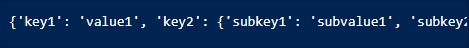

    With PrettyPrint
    
    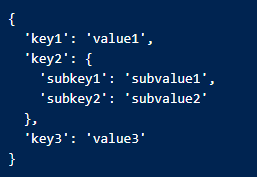
</div>



In [29]:
import xmltodict
import xml.etree.ElementTree as ET
import pprint
pp = pprint.PrettyPrinter(indent=2)

# take a block based on type and number as example, this document will be used in the second next cell
type = 'OB'
number = 1

#where the block is exported
path = os.getcwd() +'\\Blocks\\' + type + str(number) + '.xml' ##int has to be string to be able to concatenate with string
tree = ET.parse(path)

xml_data = tree.getroot()
xmlstr = ET.tostring(xml_data, encoding='utf-8', method='xml') ##convert the xml to a string
doc = dict(xmltodict.parse(xmlstr)) # create dictionary of the .xml

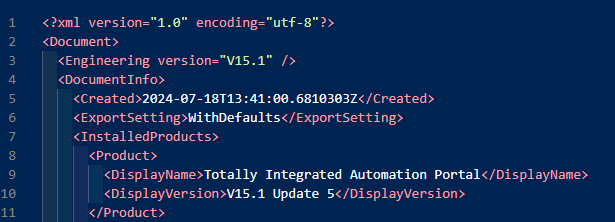

'Document' is the top-level xml tag (see fig)

In [ ]:
# Display of the xml
pp.pprint(doc['Document']) #Open in text editor to see the structure of the xml, data are nested in the dictionary with keys and values

<div class="alert alert-block alert-info">
<b>Tips next cell (qb)</b> 

* *Network_list = doc['Document'][f'SW.Blocks.{type}']['ObjectList']['SW.Blocks.CompileUnit']*

        *['SW.Blocks.CompileUnit']* key in ObjectList gives a list of all the networks in the block --> this list contains seperated dicts for each network
    
    Each network dictionary in the value list of *['SW.Blocks.CompileUnit']* all have the same keys:
        
            1. third key 'AttributeList', contains all parameters of that the coresponding network
            2. fourth key 'ObjectList' contains the network comment and title of the network

* *if f'ns{ns}:Call' in Parts.keys()*

        if Parts contains the key ns{ns}:Call it mean that the network contains a reference to another function/functionblock + DB

    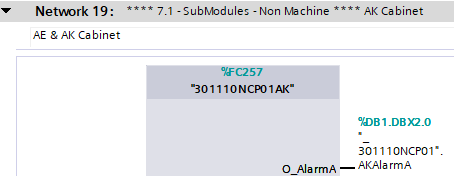 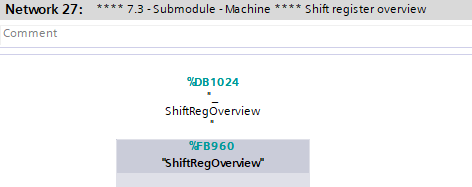

        if there is a key ns1:Instance in the value of ns{ns}CallInfo thats means that the network contains a datablock instance (functionblock + DB) else its just a function
</div>



In [31]:
# create a function that wil loop in the dictonairy 
# it stores all the parameters for each network
# the parameters are Calls or Variables
# the variables consist of constants, DB's, and Tags

def convert_xml(doc, type ): #Type = OB, FC, FB, DB, SDB, UDT, ...
    # check the amount of name spaces in the document
    NS = 0 
    while True:
        if f'@xmlns:ns{NS}' not in doc['Document'].keys():
            break
        NS += 1

    if "SW.Blocks.CompileUnit" not in doc["Document"][f"SW.Blocks.{type}"]["ObjectList"].keys():
        return {}
    #SW.Blocks.OB key of first dict --> ObjectList key of second dict nested in the first dict --> SW.Blocks.CompileUnit key of third dict nested in the second dict
    Network_list = doc['Document'][f'SW.Blocks.{type}']['ObjectList']['SW.Blocks.CompileUnit'] # get the list of all the networks

    if not isinstance(Network_list, list): # if not a list --> single network, for consistancy make list
        Network_list = [Network_list]

    Block = {} # storing the parameters

    for Network_Number in range(0, len(Network_list)): # for all the Networks, len(Network_list) = amount of network dictionarys in the list
        Network = Network_list[Network_Number] #current network

        # storing the parameters for each network
        N = {}
        Var = {}
        CallStruct = []
        DB = {}
        TAG = {}
        CON = {}
        box = {}

        
        for ns in range(NS): # for all the namespaces 
            if Network["AttributeList"]["NetworkSource"] == None: # make sure there are paremters to export
                continue # goes to the next iteration in the for-loop
            if f"ns{ns}:FlgNet" in Network["AttributeList"]["NetworkSource"].keys():
                Parts = Network["AttributeList"]["NetworkSource"][f"ns{ns}:FlgNet"][f"ns{ns}:Parts"] # the different parts in the Network
                Wires = Network["AttributeList"]["NetworkSource"][f"ns{ns}:FlgNet"][f"ns{ns}:Wires"][f"ns{ns}:Wire"] # the connections between the parts
                
                if not isinstance(Wires, list): # if not a list, make list for consistancy
                    Wires = [Wires]
                
                if f'ns{ns}:Access' in Parts.keys():

                    if not isinstance(Parts[f"ns{ns}:Access"], list): # if the value pair of "ns{ns}:Access" is not a list, make list for consistancy
                        P = [Parts[f"ns{ns}:Access"]]
                    else:
                        P = Parts[f"ns{ns}:Access"]

                    for dic in P:
                        if f'ns{ns}:Symbol' in dic.keys(): # if symbol: means Tag or DB
                            comp = dic[f'ns{ns}:Symbol'][f'ns{ns}:Component'] # == tag or DB name
                            id = dic['@UId']# == unique id of the tag or DB
                        
                            for wire in Wires: # for all the connections, check what parameter is connected to what
                                if f'ns{ns}:IdentCon' in wire.keys():
                                    if wire[f'ns{ns}:IdentCon']['@UId']==id:  # checks each dict in 'wire' if the IdentCon dict value of key @UId has the same id value as the id of the tag
                                        Name_con = wire[f'ns{ns}:NameCon']['@Name'] # if so store the name to where the connection goes 

                            if isinstance(comp, list): # if it is a list, it refers that the tag is stored in a DB
                                DB[Name_con] = [comp[i]['@Name'] for i in range(len(comp))] #Add the full name of the tag (DBname + tagname) that connect to the parameter
                            else: # if its not a list it refers to a Tag
                                TAG[Name_con] = comp['@Name']

                        
                        if f'ns{ns}:Constant' in dic.keys(): # if value of variable is constant
                            comp = dic[f'ns{ns}:Constant']
                            id = dic['@UId']
                            
                            for wire in Wires:
                                if f'ns{ns}:IdentCon' in wire.keys():
                                    if wire[f'ns{ns}:IdentCon']['@UId']==id:
                                        Name_con = wire[f'ns{ns}:NameCon']['@Name']
                            CON[Name_con] = comp

                if f'ns{ns}:Call' in Parts.keys():  # if yes, the network contain a function/functionblock
                    if not isinstance(Parts[f'ns{ns}:Call'], list): # if not a list, make list for consistancy
                        toto = [Parts[f'ns{ns}:Call']] #extract the (single) value of the key 'ns{ns}:Call' in dict parts and make it a list
                    else:
                        toto = Parts[f'ns{ns}:Call'] 

                    for i in toto: 
                        comp = i[f'ns{ns}:CallInfo']
                        blocktype = comp['@BlockType']
                        Name = comp['@Name'] #name of the FB/FC

                        
                        if f'ns{ns}:Instance' in comp.keys(): # if the functionblock has an instance (DB/datablock) 
                            Name_instance = comp[f'ns{ns}:Instance'][f'ns{ns}:Component']['@Name'] # store the name of the instance (DB)
                        else:
                            Name_instance = None
                        
                        CallStruct.append({'Name':Name, 'BlockType':blocktype, 'Instance':Name_instance})

                for wire in Wires: # for the wires who are two times connected to an NameCon, if a parameter has multiple connections
                    if (f'ns{ns}:NameCon' in wire.keys()) and ( isinstance(wire[f'ns{ns}:NameCon'], list)):
                        try:
                            Name_con = wire[f'ns{ns}:NameCon'][1]['@Name']
                            box[Name_con] = '--MORE INFO NEEDED--'
                        except:
                            print(wire)
                        
        # save the parameters
        Var['Tags'] = TAG
        Var['DBs'] = DB
        Var['Const'] = CON
        Var['Box'] = box
        N['Variables'] = Var
        N['CallStruct'] = CallStruct
        Block[f'Network{Network_Number+1}'] = N
    return Block

    

In [32]:
# example of dictionairy
FC = convert_xml(doc, 'OB') # veranderd naar OB want in mijn XML bestand is het een OB
if False:
    pp.pprint(FC['Network2']) #Print single network
else:
    pp.pprint(FC) #print every network

{ 'Network1': { 'CallStruct': [],
                'Variables': { 'Box': {},
                               'Const': { 'in2': { 'ns1:ConstantType': 'Int',
                                                   'ns1:ConstantValue': '1'}},
                               'DBs': {},
                               'Tags': { 'en': 'TRUE',
                                         'in1': 'CPUOB1Execution',
                                         'out': 'CPUOB1Execution'}}},
  'Network10': { 'CallStruct': [ { 'BlockType': 'FC',
                                   'Instance': None,
                                   'Name': 'DiagPLCOverview'}],
                 'Variables': { 'Box': {},
                                'Const': {},
                                'DBs': { 'H_IAnim': [ '_209000NCP01',
                                                      'H_DiagPLCOverviewIAnim'],
                                         'O_AlarmA': [ '_209000NCP01',
                                                    

In [33]:

list_of_files = [] # make a list of all the xml files:

for filename in os.listdir(os.getcwd() +'\\Blocks'):
    if filename[0:2] in ['FB', 'FC', 'OB']: # take only the FB, FC, and OB's
        list_of_files.append(filename)


In [34]:
import pandas as pd # import pandas for storing the data

configs = pd.DataFrame(columns=['ProjectName', 'Block', 'Network','ConfigParameter', 'Value', 'Type']) # making an empty dataframe to store the configs
io_config = pd.DataFrame() # making a second dataframe

for file in list_of_files: # for all the .xml of the FB, FC and OB's    
    type = file[:2] # type of the block =(FB, FC or OB)
    number = file[2:-4] # number of the block -4 to remove the .xml

    path = os.getcwd() +'\\Blocks\\' + type + str(number) + '.xml' # path of xml 
    
    # convert xml to ditionary to analyse
    tree = ET.parse(path)
    xml_data = tree.getroot()
    xmlstr = ET.tostring(xml_data, encoding='utf-8', method='xml')
    doc = dict(xmltodict.parse(xmlstr))

    dic  = convert_xml(doc, type) # get all the paremters in dictionary format
    #dic = returned value of the function convert_xml (Dictionary that contains each network with corresponding parameters)
    for Network in dic.keys(): # for every network in the block
        for key in dic[Network]['Variables'].keys(): # for all the types in the variables (Tags, DBs, constants, box)
            for c_key, value in dic[Network]['Variables'][key].items(): # c_key = name of the variable, value = value of the paramter (for every key-value pair in dic[Network]['Variables'][key].items())
                if (c_key in ['I_LowSpeed', 'I_HighSpeed']) or (c_key[:2] == 'C_') : # if the name of the variable starts with 'C_' or is 'I_LowSpeed' or 'I_HighSpeed' it is a config
                    # store the attributes of the config
                    new = pd.DataFrame({'ProjectName': [myproject.Name], 'Block':[type+str(number)], 'ConfigParameter':[c_key], 'Value':[value], 'Network': [Network], 'Type':[key]})
                    
                    configs = pd.concat([configs, new], ignore_index=True)    # update the config dataframe
                
                elif ('io_config' in c_key.lower()): # other parameters to store
                    new = pd.DataFrame({'ProjectName': [myproject.Name], 'Block':[type+str(number)], 'ConfigParameter':[c_key], 'Value':[value], 'Network': [Network], 'Type':[key]})
                    io_config = pd.concat([io_config, new], ignore_index=True)    # store in an other dataframe


Volgende cell eens aan Joris vragen

<div class="alert alert-block alert-info">
<b>Tips next cell (qb)</b> 

* *LIST = io_config.at[index,'Value']*

        This is using the at accessor to get the value in the 'Value' column at the row specified by index


</div>

In [35]:
for index in io_config.index: # for all the indexes in the io_config dataframe
    try: 
        LIST = io_config.at[index,'Value']
        configs.loc[
            (configs['Block'] == io_config.at[index, 'Block'])&
            (configs['Network'] == io_config.at[index, 'Network'])&
            (configs['ProjectName'] == io_config.at[index, 'ProjectName']) , 'IO_Config1'
            ] = LIST[0]
        configs.loc[
            (configs['Block'] == io_config.at[index, 'Block'])&
            (configs['Network'] == io_config.at[index, 'Network'])&
            (configs['ProjectName'] == io_config.at[index, 'ProjectName']) , 'IO_Config2'
            ] = LIST[1]
        
    except IndexError:
        pass

In [36]:
print(io_config.to_string())

   ProjectName  Block ConfigParameter                                      Value    Network Type
0   P712713A01  FC290       IO_Config            [_209000NCP01Config, AE01-JC31]   Network2  DBs
1   P712713A01  FC290       IO_Config            [_209000NCP01Config, AE01-JC31]   Network3  DBs
2   P712713A01  FC290       IO_Config            [_209000NCP01Config, AK02-JC32]   Network4  DBs
3   P712713A01  FC290       IO_Config            [_209000NCP01Config, AK02-JC32]   Network5  DBs
4   P712713A01  FC290       IO_Config            [_209000NCP01Config, AK02-JC32]   Network6  DBs
5   P712713A01  FC290       IO_Config            [_209000NCP01Config, AK02-JC32]   Network7  DBs
6   P712713A01  FC302       IO_Config                 [_209210ZM01Config, Andon]   Network1  DBs
7   P712713A01  FC302       IO_Config      [_209210ZM01Config, 210CS22ProdSpeed]   Network2  DBs
8   P712713A01  FC302       IO_Config  [_209210ZM01Config, 210CS22ProdStartStop]   Network3  DBs
9   P712713A01  FC302       IO

In [37]:
print(configs.to_string())

     ProjectName   Block     Network                  ConfigParameter                                                                          Value   Type         IO_Config1            IO_Config2
0     P712713A01  FB1102   Network27                   C_UpperLevelHW                                                                          FALSE   Tags                NaN                   NaN
1     P712713A01  FB1102   Network27               C_UpperLevelSafety                                                                          FALSE   Tags                NaN                   NaN
2     P712713A01  FB1102   Network27                         C_Safety                                                                          FALSE   Tags                NaN                   NaN
3     P712713A01  FB1102   Network27                       C_Mechanic                                                                          FALSE   Tags                NaN                   NaN
4     P712713A0

<div class="alert alert-block alert-info">
<b>Tips next cell (qb)</b> 

* *configs.at[index, 'ConstantValue'] = configs.at[index, 'Value']['ns1:ConstantValue']*

        Try to set a new value in configs dataframe using .at in the new column 'ConnstantValue', and make the value equal as the value in 'value' column on the same index (row) of the key-value pair of 'ns1:ConstantValue' if there is no 'ns1:ConstantValue' key in 'value' column try 'ns2:ConstantValue' and try '@name'. If the value isnt a constant type it'll get to the last step and it'll get passed. This results in adding 'NaN' in the newt 'ConstantValue' column
        

    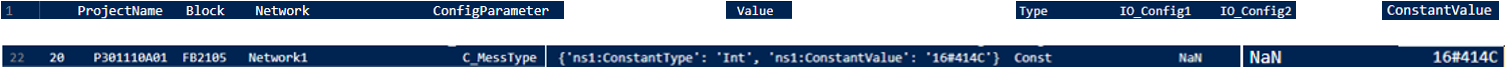


</div>

In [38]:

for index in configs.index: # for all the indexes in the configs dataframe

    try:
        configs.at[index, 'ConstantValue'] = configs.at[index, 'Value']['ns1:ConstantValue']
    except:
        try:
            configs.at[index, 'ConstantValue'] = configs.at[index, 'Value']['ns2:ConstantValue']
        except:
            try:
               configs.at[index, 'ConstantValue'] = configs.at[index, 'Value']['@Name']
            except:
                pass

In [39]:
name_dic = {}
for block in Blocks:
    name_dic[str(block).split('.')[-1]+str(block.Number)] = block.Name # output of str(block) is Siemens.Engineering.SW.Blocks.OB, we want to make a key of the type and number of the block and the value the name of the block

for index in configs.index:
    block_name = configs.at[index, 'Block'] # get the block name
    configs.at[index, 'BlockName'] =  name_dic[block_name] # set value of the block name in the dataframe on current index in the new column 'BlockName'


In [40]:
print(configs.to_string())

     ProjectName   Block     Network                  ConfigParameter                                                                          Value   Type         IO_Config1            IO_Config2                                       ConstantValue                           BlockName
0     P712713A01  FB1102   Network27                   C_UpperLevelHW                                                                          FALSE   Tags                NaN                   NaN                                                 NaN                         LMovFnc2Pos
1     P712713A01  FB1102   Network27               C_UpperLevelSafety                                                                          FALSE   Tags                NaN                   NaN                                                 NaN                         LMovFnc2Pos
2     P712713A01  FB1102   Network27                         C_Safety                                                                          FA

### 7. Safety Parameters

Acces some of the safety parameters of the hardware objects (devices and channels). 

Safety parameters are only available for a few devices. acces these attributes is only available via the .GetAttribute method. 

To check wether the safety parameter is indeed an attribute of your HW, the function .GetAttributeInfos returns a list of all available attributes for a specific Object. 



<br>
An example is given to store some safety parameters in pandas DataFrame. Moreover a connection is made to the Tagtable. More info of acces the tagtable is written in section 5.2.2

In [41]:
#OWN NETWORK (QB) TO SEE WICH DEVICES HAVE FAILSAFE 
    
# for dev in Items:
#         print(dev.Name)
#         for item in dev.Items:
#             print("\t" + item.Name)
#             for info in dev.GetAttributeInfos():
#                 print("\t\t" + info.Name)


#searching after device that has safety parameters in project
for item in Items:
    for info in item.GetAttributeInfos():
        if info.Name == 'Failsafe_FBlockID':
            print(info.Name, item.Name)
            

Failsafe_FBlockID F-Module I/O (2 Byte)
Failsafe_FBlockID DFS22B (8 Byte)
Failsafe_FBlockID 209000AS02-JX39.11
Failsafe_FBlockID DFS22B (8 Byte)
Failsafe_FBlockID 211212AE1-JX200.22
Failsafe_FBlockID F-Module I/O (2 Byte)
Failsafe_FBlockID 209210AS10-JX40.11
Failsafe_FBlockID DFS21B (2 Byte)
Failsafe_FBlockID DFS21B (2 Byte)
Failsafe_FBlockID PROFIsafe 16 Bool IO standard
Failsafe_FBlockID F-Module I/O (2 Byte)
Failsafe_FBlockID 209000AK04-JX37.12
Failsafe_FBlockID DFS22B (8 Byte)
Failsafe_FBlockID 209000AK04-JX37.11
Failsafe_FBlockID 209220AX01-JX51.21
Failsafe_FBlockID 209230AS10-JX60.11
Failsafe_FBlockID 211212AE1-JX200.21
Failsafe_FBlockID DFS22B (8 Byte)
Failsafe_FBlockID 209210AX01-JX41.21
Failsafe_FBlockID 209000AS01-JX38.11
Failsafe_FBlockID 209210AS20-JX48.11
Failsafe_FBlockID 209000AK01-JX35.11
Failsafe_FBlockID 209220AS11-JX52.11
Failsafe_FBlockID 209220AS10-JX50.11
Failsafe_FBlockID 209210AS11-JX42.11
Failsafe_FBlockID F-Module I/O (2 Byte)
Failsafe_FBlockID 209210AX02-JX43

<div class="alert alert-block alert-info">
<b>Tips next cell (qb)</b> 

* *device = [item for item in Items if item.Name == '209000AS02-JX39.11'][X]* 

            Had to change the index[X] from -1 to 0 -- NEEDS TO BE RESEARCHED what the difference is between the 2 elements wich meet the condition
</div>

In [42]:
device = [item for item in Items if item.Name == '209000AS02-JX39.11'][0] # get a  device as example changed index 1 to 0
# note that some device items have the same name, when you want to take a device with failsafe parameters, the name alone is not a guarentee

print(device.Name)

209000AS02-JX39.11


In [43]:
# print all the available attributes and check if there are Failsafe parameters
for info in device.GetAttributeInfos():
    print(info.Name)

Classification
Comment
CommentML
Container
Failsafe_BehaviorAfterChannelFault
Failsafe_DIPSwitchSetting
Failsafe_FBlockID
Failsafe_FCRCSeed
Failsafe_FCheckSeqNr
Failsafe_FCheckiPar
Failsafe_FDestinationAddress
Failsafe_FIODBName
Failsafe_FIODBNumber
Failsafe_FMonitoringtime
Failsafe_FParVersion
Failsafe_FParameterSignatureIndividualParameters
Failsafe_FParameterSignatureWithAddresses
Failsafe_FParameterSignatureWithoutAddresses
Failsafe_FPassivation
Failsafe_FSIL
Failsafe_FSourceAddress
Failsafe_F_CRC_Length
Failsafe_ManualAssignmentFIODBNumber
Failsafe_ManualAssignmentFMonitoringtime
Failsafe_ReintegrationAfterChannelFault
Failsafe_ShortCircuitTest_0
Failsafe_ShortCircuitTest_1
Failsafe_ShortCircuitTest_2
Failsafe_ShortCircuitTest_3
Failsafe_ShortCircuitTest_4
Failsafe_ShortCircuitTest_5
Failsafe_ShortCircuitTest_6
Failsafe_ShortCircuitTest_7
Failsafe_StartupTimeOfSensorAfterShortCircuitTest_0
Failsafe_StartupTimeOfSensorAfterShortCircuitTest_1
Failsafe_StartupTimeOfSensorAfterShortCi

In [44]:
# example of how to retrieve one Attribute 
print(' Failsafe_FBlock_ID: \t', device.GetAttribute('Failsafe_FBlockID')) #Author has to be 'Failsafe_FBlockID'

 Failsafe_FBlock_ID: 	 1


In [45]:
# Start of the example. First, we get  the Tagtable. SECTION 5.2.2
import pandas as pd
import Siemens.Engineering.HW.Features as hwf

IO_type_dict = {'I':'Input', 'Q': 'Output', 'M':'Other'}

TagTable_df = pd.DataFrame() #initialize the dataframe
for plc in PLC:

    software_container = tia.IEngineeringServiceProvider(plc).GetService[hwf.SoftwareContainer]() # Getting the software container
    software_base = software_container.Software # getting the plc software

    Tags = set() #initialize the set of tags
    for table in software_base.TagTableGroup.TagTables:
        Tags.update(table.Tags) # add all the tags of the tagtables to the set
    for tag in Tags:
        comment = ''
        for s in tag.Comment.Items:
            comment += s.Text #text is een String variabele waarin de comment van de tag s zit 

        new = pd.DataFrame({
            'plc_Name': [plc.Name],
            'Name': [tag.Name],
            'LogicalAddress': [tag.LogicalAddress],
            'Address':[float(''.join(s for s in tag.LogicalAddress if s.isdigit()))/10],
            'Comment': [comment],
            'Data_type': [tag.DataTypeName], 
            'IO_type' : [IO_type_dict[tag.LogicalAddress[1]]]
        })
        TagTable_df = pd.concat([TagTable_df, new], ignore_index=True)

In [46]:
print(TagTable_df.sort_values(by='Address').to_string()) 

             plc_Name                                  Name LogicalAddress  Address                                                                                                                                                                                                                                                                         Comment              Data_type IO_type
1243  P209000AE01-JC5                                  Q0.0          %Q0.0      0.0                                                                                                                                                                                                                                                                           Spare                   Bool  Output
1003  P209000AE01-JC5                       209000AE01E1QM1          %I0.0      0.0                                                                                                                                               

In [47]:
# let's create 2 dataframes to store the safety parameters of channels and devices
channel_df = pd.DataFrame()
parameter_df = pd.DataFrame()

for deviceitem in Items: # checking all the devices
    for channel in deviceitem.Channels: # checking all the channels
        
        try: # when the channel got some parameters ( in this case an output Failsafe channel)
            StartAddress = deviceitem.Addresses[1].StartAddress # addres of the tag to link the tags in the tagtable
            #index filters the dataframe by the .loc function to get the first index '.index[0]' that meets the condition
            index = TagTable_df.loc[(TagTable_df['Address']==StartAddress+channel.Number/10)&(TagTable_df['IO_type']==str(channel.IoType))].index[0] # this is the corresponding tag with address: StartAddress+channel_Number/10
            new = pd.DataFrame({
                'StationName':[deviceitem.Parent.Parent.GetAttribute('Name')],
                'DeviceName':[deviceitem.Name],
                'Channel':[channel.Number], 
                'DiagnosisWireBreak':[channel.GetAttribute('Failsafe_DiagnosisWireBreak')],
                'Activated': [channel.GetAttribute('Failsafe_Activated')],
                'Type':[deviceitem.Parent.GetAttribute('TypeName')],
                'IOType':[channel.IoType],
                'Tag_Name' : [TagTable_df.at[index, 'Name']],
                'Control_Activation':       [(
                    (TagTable_df.at[index, 'Name'] == f'I{StartAddress+channel.Number/10:.1f}')
                    or ( 'SPARE' in (TagTable_df.at[index, 'Comment']).upper() )
                        != channel.GetAttribute('Failsafe_Activated')
                )]
                      # Checks wether the activation is set to correct state
                # The activation state should be inactive when: 1. the name of the tag is the same as the tag address or 2. SPARE is written in the comment in the tag

                })
            channel_df = pd.concat([channel_df, new], ignore_index=True)
        except:
            pass

        try:  # when the channel got some parameters ( in this case an Input Failsafe channel)
            StartAddress = deviceitem.Addresses[0].StartAddress # startaddres to link the tags in the tagtable
            index = TagTable_df.loc[(TagTable_df['Address']==StartAddress+channel.Number/10)&(TagTable_df['IO_type']==str(channel.IoType))].index[0] # this is the corresponding tag with address: StartAddress+channel_Number/10
            new = pd.DataFrame({
                'StationName':[deviceitem.Parent.Parent.GetAttribute('Name')],
                'DeviceName':[deviceitem.Name],
                'Channel':[channel.Number], 
                'DiscrepancyTime[ms]':[channel.GetAttribute('Failsafe_DiscrepancyTime')], 
                'SensorSupply': [channel.GetAttribute('Failsafe_SensorSupply')],
                'Activated': [channel.GetAttribute('Failsafe_Activated')],
                'Type':[deviceitem.Parent.GetAttribute('TypeName')],
                'IOType':[channel.IoType],
                'Tag_Name' : [TagTable_df.at[index, 'Name']],
                'Control_Activation': 
                
                [(
                    (TagTable_df.at[index, 'Name'] == f'I{StartAddress+channel.Number/10:.1f}')
                    or ( 'SPARE' in (TagTable_df.at[index, 'Comment']).upper() )
                        != channel.GetAttribute('Failsafe_Activated')
                    )]
                        # Checks wether the activation is set to correct state
                # The activation state should be inactive when: 1. the name of the tag is the same as the tag address or 2. SPARE is written in the comment in the tag
                

            })
            channel_df = pd.concat([channel_df, new], ignore_index=True)
        except:
            pass
    
    for i in range(8): # for the devices check different shortcircuit test
        # This loop can be written togheter with the above loop 
        try:
            new = pd.DataFrame({
                'StationName':[deviceitem.Parent.Parent.GetAttribute('Name')],
                'DeviceName':[deviceitem.Name],
                'Channel': [i],
                'FDestinationAddress':[deviceitem.GetAttribute('Failsafe_FDestinationAddress')],
                'FIODBName':[deviceitem.GetAttribute('Failsafe_FIODBName')],
                'FIODBNumber':[deviceitem.GetAttribute('Failsafe_FIODBNumber')],
                'FMonitoringtime[ms]':[deviceitem.GetAttribute('Failsafe_FMonitoringtime')],
                'FSourceAddress':[deviceitem.GetAttribute('Failsafe_FSourceAddress')],
                'FPassivation':[deviceitem.GetAttribute('Failsafe_FPassivation')],
                'Type':[deviceitem.Parent.GetAttribute('TypeName')]
            })
            try:
                new['ShortCircuitTest'] = deviceitem.GetAttribute(f'Failsafe_ShortCircuitTest_{i}')
                new['StartupTimeOfSensorAfterShortCircuitTest[ms]'] = deviceitem.GetAttribute(f'Failsafe_StartupTimeOfSensorAfterShortCircuitTest_{i}')
                new['TimeForShortCircuitTest[ms]'] = deviceitem.GetAttribute(f'Failsafe_TimeForShortCircuitTest_{i}')
            except:
                pass

            parameter_df = pd.concat([parameter_df, new], ignore_index=True)
        except:
            pass


In [48]:
print(channel_df.loc[channel_df['Control_Activation']==False].sort_values(by=['DeviceName', 'Channel']).to_string())

Empty DataFrame
Columns: [StationName, DeviceName, Channel, DiscrepancyTime[ms], SensorSupply, Activated, Type, IOType, Tag_Name, Control_Activation, DiagnosisWireBreak]
Index: []


### 7. IO Cycle

This section is a usecase of the Hardware connections. The first function will use openness to export all the connected hardware. 

In [1]:
# note that type is used as a parameter before and can give some errors so we delete the type object
del type

def IOCycleParameters(Items):
    '''
    returns the IO Cycle Parameters in pandas-dataframe
    '''

    df = pd.DataFrame()

    for item in Items: # for all items in the project
        network_service = tia.IEngineeringServiceProvider(item).GetService[hwf.NetworkInterface]() # get the interface
        
        if type(network_service) == hwf.NetworkInterface: # if the interface excist
            
            if network_service.IoControllers.Count != 0: # if it is an io controller
                adress = network_service.Nodes[0].GetAttribute('Address') # get the IP Address
                iocontroller = network_service.IoControllers[0]
                new = pd.DataFrame({'IP_Address':[adress],'StationName':[item.Parent.Parent.GetAttribute('Name')], 'Interface':[item.Name]})
                
                # get some attributes of the item 

                try:
                    new['Type'] = item.Parent.GetAttribute('TypeName')
                except:
                    try:
                        new['Type'] = item.GetAttribute('TypeName')
                    except:
                        pass

                try:
                    new['OrderNumber'] = item.Parent.GetAttribute('OrderNumber')
                except:
                    try:
                        new['OrderNumber'] = item.GetAttribute('OrderNumber')
                    except:
                        pass
                    

                try:
                    new['TypeIdentifier'] = item.Parent.GetAttribute('TypeIdentifier')
                except:
                    try:
                        new['TypeIdentifier'] = item.GetAttribute('TypeIdentifier')
                    except:
                        pass
                    

                try:
                    new['SyncRole'] = iocontroller.GetAttribute('SyncRole').Name
                except:
                    pass     

                try:
                    new['DeviceNumber'] = iocontroller.GetAttribute('PnDeviceNumber')
                except:
                    pass   
                df = pd.concat([df, new], ignore_index=True)
            
            # do the same if it is an io connector
            elif network_service.IoConnectors.Count != 0:
                adress = network_service.Nodes[0].GetAttribute('Address')
                ioconnector = network_service.IoConnectors[0]
                new = pd.DataFrame({ 'IP_Address':[adress], 'StationName':[item.Parent.Parent.GetAttribute('Name')], 'Interface':[item.Name]})
                
                try:
                    new['Type'] = item.Parent.GetAttribute('TypeName')
                except:
                    try:
                        new['Type'] = item.GetAttribute('TypeName')
                    except:
                        pass

                try:
                    new['OrderNumber'] = item.Parent.GetAttribute('OrderNumber')
                except:
                    try:
                        new['OrderNumber'] = item.GetAttribute('OrderNumber')
                    except:
                        pass
                    

                try:
                    new['TypeIdentifier'] = item.Parent.GetAttribute('TypeIdentifier')
                except:
                    try:
                        new['TypeIdentifier'] = item.GetAttribute('TypeIdentifier')
                    except:
                        pass
                try:
                    new['ConnectedToIoSystem'] = ioconnector.GetAttribute('ConnectedToIoSystem').Name
                except:
                    pass     

                try:
                    new['DeviceNumber'] = ioconnector.GetAttribute('PnDeviceNumber')
                except:
                    pass        

                try:
                    if ioconnector.GetAttribute('PnUpdateTimeAutoCalculation'):
                        new['UpdateMethod'] = 'Automatically'
                    else:
                        new['UpdateMethod'] = 'Manually'
                except:
                    pass

                try:
                    new['UpdateTime[ms]'] = int(ioconnector.GetAttribute('PnUpdateTime'))/1000000 #ps->ms
                except:
                    pass

                try:
                    new['UpdateTimeAdaption'] = ioconnector.GetAttribute('PnUpdateTimeAdaption')
                except:
                    pass

                try:
                    new['UpdateCycle'] = ioconnector.GetAttribute('PnWatchdogFactor')
                except:
                    pass  

                try:
                    new['WatchdogTime[ms]'] = int(ioconnector.GetAttribute('PnWatchdogTime'))/1000000 #ps->ms
                except:
                    pass             

                try:
                    new['RtClass'] = ioconnector.GetAttribute('RtClass')
                except:
                    pass  

                try:
                    new['SyncRole'] = ioconnector.GetAttribute('SyncRole')
                except:
                    pass  

                df = pd.concat([df, new], ignore_index=True)
    return df   
IO_df = IOCycleParameters(Items)

NameError: name 'type' is not defined

In [50]:
print(IO_df.to_string())

       IP_Address           StationName             Interface                            Type          OrderNumber                                                                     TypeIdentifier ConnectedToIoSystem  DeviceNumber   UpdateMethod  UpdateTime[ms] UpdateTimeAdaption  UpdateCycle  WatchdogTime[ms] RtClass         SyncRole
0    10.210.79.51       209220AX01-JW51       209220AX01-JW51                  IM 155-6 PN ST  6ES7 155-6AU01-0BN0                                               OrderNumber:6ES7 155-6AU01-0BN0/V4.1  PROFINET IO-System          51.0       Manually             8.0              False         32.0             256.0      RT  NotSynchronized
1   10.210.79.150    209230CA21M4-UE150    209230CA21M4-UE150            MOVIFIT Classic V1.7             18209734           GSD:GSDML-V2.25-SEW-MTX-20190115-091515.XML/DAP/Classic PDEV MRP S12 V17  PROFINET IO-System         150.0       Manually             8.0              False         32.0             256.0     NaN    

### 8. Project Library

The project library is a direct attribute of the project and can be accesed by _myproject.ProjectLibrary_.

Navigating trhough the folders is the same as in TIA Portal. 
 - First: go to Type folder
 - Second: navigate through the folders and choos your library block

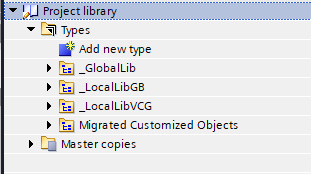

In [51]:
print('Types directly in main folder:')
for typ in (myproject.ProjectLibrary.TypeFolder.Types):
    print('\t', typ.Name)
print('')
print('Folders under main folder')
for folder in (myproject.ProjectLibrary.TypeFolder.Folders):
    print('\t', folder.Name)

Types directly in main folder:

Folders under main folder
	 _GlobalLib
	 Migrated Customized Objects
	 _LocalLibGB
	 _LocalLibVCG


In [52]:
# file for example
typ = myproject.ProjectLibrary.TypeFolder.Folders[0].Folders[0].Folders[6].Types[1]
print('Name: \t',typ.Name)
print('Versions:\t'		)
for version in typ.Versions:
    print('\t', version.VersionNumber)


Name: 	 Config_ButtonPLC
Versions:	
	 15.504.0


UseCase
 - export info of the project blocks
 - export info of the library blocks
 - connect the two blocks together (whitch library block is used in in which project block)

In [53]:
def save_to_DataFrame(block, map, df, proj_name, plc_name):
    name = block.Name
    type = block.ToString().split('.')[-1] #type = DB / FB / FC / OB (str)
    number = block.Number # (int)
    date = block.ModifiedDate

    if type in ['OB', 'FB', 'GlobalDB', 'FC', 'ArrayDB']:
        new = pd.DataFrame({'Name':[name], 'Type':[type], 'Number':[number], 'ModifiedDate':[date], 'PLC':[plc_name], 'Project':[proj_name], 'Folder':[map]})
        df = pd.concat([df, new], ignore_index=True)

    elif type == 'InstanceDB':
        ION = block.InstanceOfName
        new = pd.DataFrame({'Name':[name], 'Type':[type], 'Number':[number], 'ModifiedDate':[date], 'InstanceOf':[ION], 'PLC':[plc_name], 'Project':[proj_name], 'Folder':[map]})
        df = pd.concat([df, new], ignore_index=True)
    else:
        raise ValueError('Blocktype not recognised')
    
    return df

def give_blocks(map, df, proj_name, plc_name):
    for block in map.Blocks:
        df = save_to_DataFrame(block, map.Name, df, proj_name, plc_name)
    for group in map.Groups:
        df = give_blocks(group, df, proj_name, plc_name)
    return df

def give_types(map, df, proj_name, plc_name):
    for type in map.Types:
        name = type.Name
        struc = type.ToString().split('.')[-1]
        date = type.ModifiedDate

        try:
            number = type.GetAttribute('Number')
        except:
            number = None

        new = pd.DataFrame({'Name':[name], 'Type':[struc], 'Number':[number], 'ModifiedDate':[date], 'PLC':[plc_name], 'Project':[proj_name], 'Folder':[map.Name]})
        df = pd.concat([df, new], ignore_index=True)

    for group in map.Groups:
        df = give_types(group, df, proj_name, plc_name)
    return df

def ProjectBlocks(PLC, proj_name):
    print('\nFinding blocks in the project...')
    for plc in PLC:

        software_container = tia.IEngineeringServiceProvider(plc).GetService[hwf.SoftwareContainer]()
        software_base = software_container.Software

        df = pd.DataFrame()
        plc_name = plc.Name
        df = give_blocks(software_base.BlockGroup, df, proj_name, plc_name)
        df = give_types(software_base.TypeGroup, df, proj_name, plc_name)
        df['Number'] = df['Number'].astype('Int64')
    print('Done\n')
    return df

def give_blocks_library(map, library, used_library, df, proj_name, PLC):
    for type in map.Types:

        for version in type.Versions:
            comment = ''
            for t in version.Comment.Items: comment += t.Text 

            new = pd.DataFrame({'Name':[type.Name], 'Version':[version.VersionNumber], 'State':[str(version.State)], 'ModifiedDate':[version.ModifiedDate], 'Author':[version.Author], 'Comment':[comment], 'Project_Name':[proj_name], 'Folder':[map.Name]})
            library = pd.concat([library, new], ignore_index = True)

            for plc in PLC:
                software_container = tia.IEngineeringServiceProvider(plc).GetService[hwf.SoftwareContainer]()
                software_base = software_container.Software

                instanceInfos = version.FindInstances(software_base)
                instances = [instanceInfo.LibraryTypeInstance for instanceInfo in instanceInfos]


                if len(instances) == 0:
                    df.loc[(df['Name'] == type.Name) & (df['Library']!=True), ['Library']] = 'TerminatedConnection'

                for T in instances:
                    version_type = str(T).split('.')[-1]
                    new = pd.DataFrame({'Name':[type.Name], 'Version':[version.VersionNumber], 'State':[str(version.State)], 'ModifiedDate':[version.ModifiedDate], 'Author':[version.Author], 'Comment':[comment], 'Project_Name':[proj_name], 'PLC_Name':plc.Name, 'Type':[version_type], 'Number':[T.GetAttribute('Number')], 'Folder':[map.Name]})
                    used_library = pd.concat([used_library, new], ignore_index = True)

                    df.loc[(df['PLC']==plc.Name)&(df['Type']==version_type)&(df['Number']==T.GetAttribute('Number')), ['Library']] = True
                    df.loc[(df['PLC']==plc.Name)&(df['Type']==version_type)&(df['Number']==T.GetAttribute('Number')), ['Version']] = version.VersionNumber
                    df.loc[(df['PLC']==plc.Name)&(df['Type']==version_type)&(df['Number']==T.GetAttribute('Number')), ['NameInLibrary']] = type.Name
                    df.loc[(df['PLC']==plc.Name)&(df['Type']==version_type)&(df['Number']==T.GetAttribute('Number')), ['StateLibrary']] = version.State
          
    for folder in map.Folders:
        library, used_library, df = give_blocks_library(folder, library, used_library, df, proj_name, PLC)

    return library, used_library, df

def ConnectToLibrary(df, ProjectLibrary, PLC, proj_name):
    print('\nFinding Library blocks...')
    library = pd.DataFrame()
    used_library = pd.DataFrame()
    df['Library'] = [False]*len(df)

    Types_folder = ProjectLibrary.TypeFolder
    library, used_library, df = give_blocks_library(Types_folder, library, used_library, df, proj_name, PLC)
    print('Done\n')
    return library, used_library, df


In [54]:
ProjectBlocks_df = ProjectBlocks(PLC, myproject.Name)
library_df, used_library_df, ProjectBlocks_df = ConnectToLibrary(ProjectBlocks_df, myproject.ProjectLibrary, PLC, myproject.Name)



Finding blocks in the project...
Done


Finding Library blocks...
Done



In [55]:
print(library_df.to_string())

                                                    Name    Version      State         ModifiedDate        Author                          Comment Project_Name                       Folder
0                              LFuncAddSpacesAfterString   15.504.0  Committed   2/03/2023 14:12:12           VCC                       02/03/2023   P712713A01                   VB scripts
1                             LFuncAddSpacesBeforeString   15.504.0  Committed   2/03/2023 14:12:12           VCC                       02/03/2023   P712713A01                   VB scripts
2                                     LFuncAnimInVisible   15.504.0  Committed   2/03/2023 14:12:12           VCC                       02/03/2023   P712713A01                   VB scripts
3                                      LFuncAnimOutOfUse   15.504.0  Committed   2/03/2023 14:12:12           VCC                       02/03/2023   P712713A01                   VB scripts
4                              LFuncCheckTagExistsFromD

In [56]:
print(used_library_df.to_string())

                                          Name    Version      State         ModifiedDate        Author     Comment Project_Name         PLC_Name       Type  Number               Folder
0                           H_SystemVarS7-1500   15.504.0  Committed   2/03/2023 14:12:19           VCC  02/03/2023   P712713A01  P209000AE01-JC5  PlcStruct     200           FB Control
1                                     ZMStatus   15.504.0  Committed   2/03/2023 14:12:19           VCC  02/03/2023   P712713A01  P209000AE01-JC5  PlcStruct      20       FB Supervision
2                    SupervisionProdModeCmdReq   15.504.0  Committed   2/03/2023 14:12:19           VCC  02/03/2023   P712713A01  P209000AE01-JC5  PlcStruct      48       FB Supervision
3                                SupervisionZM   15.504.0  Committed   2/03/2023 14:12:19           VCC  02/03/2023   P712713A01  P209000AE01-JC5  PlcStruct     165       FB Supervision
4                       H_VDComMasterPNS7-1500   15.504.0  Committed  

In [57]:
print(ProjectBlocks_df.to_string())

                                           Name        Type  Number         ModifiedDate              PLC     Project                       Folder                      InstanceOf Library    Version                              NameInLibrary StateLibrary
0                                       Changes          FC       1   4/08/2023 14:30:25  P209000AE01-JC5  P712713A01               Program blocks                             NaN   False        NaN                                        NaN          NaN
1                                      CYC_Proc          OB      34  16/11/2021 16:38:56  P209000AE01-JC5  P712713A01                     PLC OB:s                             NaN   False        NaN                                        NaN          NaN
2                              COMPLETE RESTART          OB     100   2/04/2021 14:10:22  P209000AE01-JC5  P712713A01                     PLC OB:s                             NaN   False        NaN                                        N

### 9. Extra


In [58]:
# Function returning all methods of an object without some standard python functions

import inspect

def print_attributes(item, get = False):
    members = inspect.getmembers(item)
    print(type(item))
    print('Attributes: ')
    for item in members:
        if (item[0][0]!='_') and ((get) or (item[0][:4]!='get_')):
            print(item[0]+'\t\t' + str(item[1])+'\t\t' + str(type(item[1])))
    print('\n')
    pass

In [59]:
# returns all attributes of an object including failsafe parameters and write the value of the attribute next to it
def attribute_info(item):
    for info in item.GetAttributeInfos():
        print(info.Name, ':\t', item.GetAttribute(info.Name))



In [61]:
# closing a project
myproject.Close()
mytia.Dispose()

EngineeringObjectDisposedException: Access to a disposed object of type 'Siemens.Engineering.Project' is not possible.
   at Siemens.Engineering.Private.Session.Siemens.Engineering.Private.IInstanceSession.InvokeAction[TC](LifetimeContractHandle`1 lifetimeContractHandle, String name, IEnumerable`1 parameters, String fullName) in c:\Users\QBAUWEN1\AppData\Local\Temp\o0ujmi4g\o0ujmi4g.58.cs:line 1028
   at Siemens.Engineering.Private.InternalInstanceAccess`2.InvokeAction(String name, IEnumerable`1 parameters) in c:\Users\QBAUWEN1\AppData\Local\Temp\o0ujmi4g\o0ujmi4g.60.cs:line 338